In [1]:
import numpy as np
from astropy.io import fits
from copy import deepcopy
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load error signal (Zernikes)
folder = '/Users/cdelacroix/INSTRUMENTS/METIS/heeps_metis/input_files/wavefront'
#folder = '/mnt/disk4tb/METIS/METIS_CBASIC_CUBES/water_vapor'
Z = fits.getdata(os.path.join(folder, 'cube_Cbasic_20210601_3600s_100ms_0piston_meters_scao_only_720_WV_zpols_100.fits'))
#Z = np.array([Z[0]]*30)
Z = Z[:300]

In [3]:
scaling = 1200/8814.11*1e9
t_rep = 0.1
ts = np.arange(len(Z))*t_rep
def integ(Z, G, nLF, nHF):
    X = np.zeros(Z.shape)
    Y = deepcopy(Z)
    for n in range(nLF, len(Z)):
        X[n, :3] = X[n-nLF, :3] + G*Y[n-nLF, :3]
        Y[n, :3] = Z[n, :3] - X[n, :3]
    for n in range(nHF, len(Z)):
        X[n, 3:] = X[n-nHF, 3:] + G*Y[n-nHF, 3:]
        Y[n, 3:] = Z[n, 3:] - X[n, 3:]
    return X, Y

## Zernikes 1-3

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


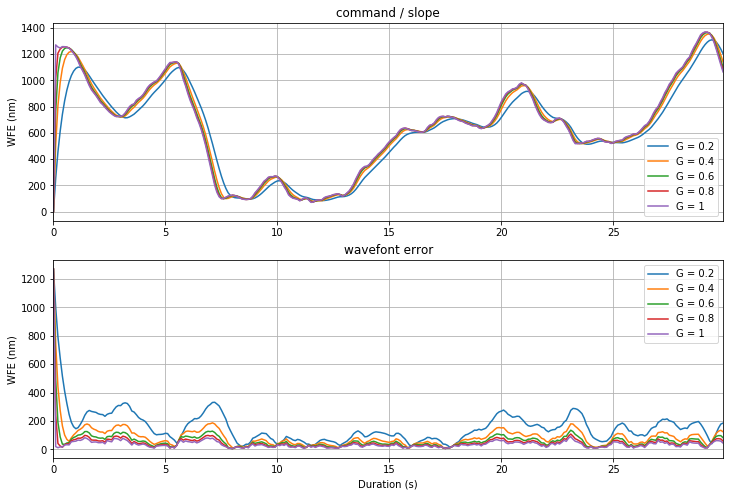

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
for G in [.2, .4, .6, .8, 1]:
    X, Y = integ(Z, G, 1, 10)
    plt.subplot(211)
    plt.plot(ts, np.sqrt(np.sum(X[:, :3]**2,1))*scaling, label='G = %s'%G)
    plt.subplot(212)
    plt.plot(ts, np.sqrt(np.sum(Y[:, :3]**2,1))*scaling, label='G = %s'%G)
plt.subplot(211); plt.title('command / slope')
plt.legend(); plt.grid('on')
plt.ylabel('WFE (nm)')
plt.xlim((0, ts[-1]))
plt.subplot(212); plt.title('wavefont error')
plt.legend(); plt.grid('on')
plt.xlabel('Duration (s)')
plt.ylabel('WFE (nm)')
plt.xlim((0, ts[-1]));

## Zernikes 4-100

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


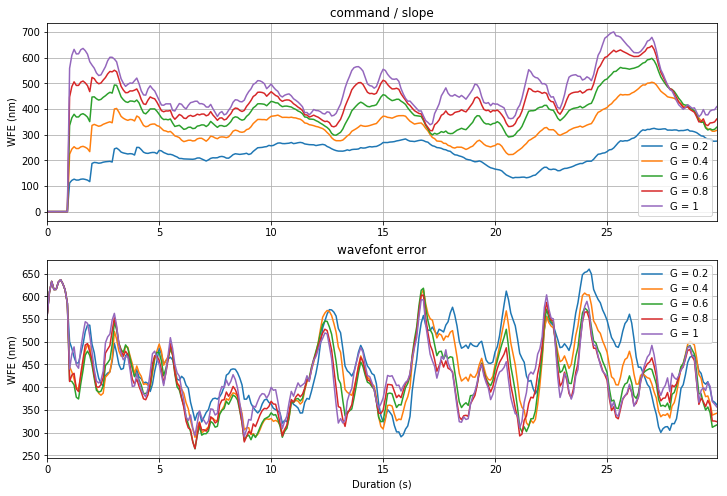

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
for G in [.2, .4, .6, .8, 1]:
    X, Y = integ(Z, G, 1, 10)
    plt.subplot(211)
    plt.plot(ts, np.sqrt(np.sum(X[:, 3:]**2,1))*scaling, label='G = %s'%G)
    plt.subplot(212)
    plt.plot(ts, np.sqrt(np.sum(Y[:, 3:]**2,1))*scaling, label='G = %s'%G)
plt.subplot(211); plt.title('command / slope')
plt.legend(); plt.grid('on')
plt.ylabel('WFE (nm)')
plt.xlim((0, ts[-1]))
plt.subplot(212); plt.title('wavefont error')
plt.legend(); plt.grid('on')
plt.xlabel('Duration (s)')
plt.ylabel('WFE (nm)')
plt.xlim((0, ts[-1]));